# Overview and understand the lab
Multivariate linear regression
We want to predict the sale price based on many input features
Multivariate linear => more than one feature

# 1-Usefull libraries

In [ ]:
#numpy for linear algebra operations
import numpy as np
#pandas for dataframe
import pandas as pd

#seaborn + matplotlib for graphical plot
#seaborn allows to have advanced graphical content
import seaborn as sns
import matplotlib.pyplot as plt
#sklearn for ml operations
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
#LabelEncoder function allows to encode
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

# 2-Data pre-processing : ETL process

In [ ]:
#Linux cmd
!wget https://raw.githubusercontent.com/Data-Science-FMI/ml-from-scratch-2019/master/data/house_prices_train.csv

--2022-01-26 16:26:40--  https://raw.githubusercontent.com/Data-Science-FMI/ml-from-scratch-2019/master/data/house_prices_train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 460676 (450K) [text/plain]
Saving to: ‘house_prices_train.csv’

house_prices_train. 100%[===================>] 449.88K  --.-KB/s    in 0.05s   

2022-01-26 16:26:41 (9.48 MB/s) - ‘house_prices_train.csv’ saved [460676/460676]



In [ ]:
#Data loading
data_frame = pd.read_csv('house_prices_train.csv')

Quick viz of 10 sample of data content

In [ ]:
data_frame.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,...,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,...,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,...,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,...,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,

In our dataframe, we have 80 features.
Here we will remove the Id colum because it can not be used as a feature

In [ ]:
#We will remove the Id column because it is not important for the prediction
#Id feature is not necessary
data_frame.drop("Id", axis = 1, inplace = True)

In [ ]:
data_frame.head(10)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,GasA,Ex,Y,SBrkr,1077,0,0,10

In [ ]:
# Checking the data size
data_frame.shape

(1460, 80)

Now, oOur dataframe contains 80 features and 1460 samples after removing the Id col

 **h(X)=thet0+theta1*x1+.....+theta80*x80**

# 3-Feature engineering & Data Analysis

In this section, we work about the features correlation to the predicted target (SalePrice).

We will evaluate the pertinence of each feature in order to take the right features that have a great impact of our model.

**We have two approaches:**

1.   Manually : consists of evaluate the behaviour between the SalePrice and the current evaluated feature. It must take lot of time if we have lot of feature ( in our case we 80 features).
2.   Automatically : consists of using a correlation matrix that compute the pairwise between all features.

**In our context, we will use the second because approaches because we gain lot of time during the feature engineering process.**



We quickly visualize the PCA of the SalePrice.

In [ ]:
data_frame['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

The max sale price is 750k

The min sale price is approximate 350k

**New, We will analyze the outliers points in the SalePrice**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


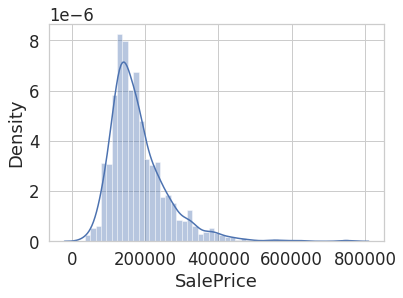

In [ ]:
#We use seaborn
#change the plot configuration such as the style and size
sns.set(style='whitegrid', font_scale=1.5)
#We use the distplot() function to plot the distribution of the SalePrice
sns.distplot(data_frame['SalePrice'])

The global sale price is between 100k and 200k.

For a high price will have lot of outliers points.

## Feature 1 : GrLivErea (Global Living Area)

Here, we will check the impact of the GrLivErea on the sale price (target)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


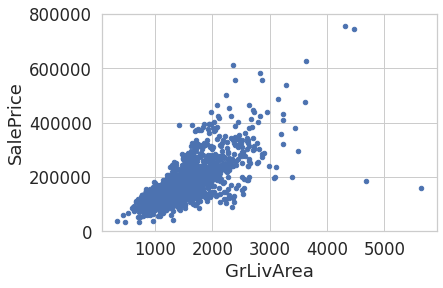

In [ ]:
var_x = 'GrLivArea'
var_y='SalePrice'
data = pd.concat([data_frame[var_x], data_frame[var_y]], axis=1)
data.plot.scatter(x=var_x, y=var_y, ylim=(0,800000))

We remark that, we have a correlation between the Global Living Area (GrLivArea) and The Sale price (SalePrice).

The sale price inscreases with the global living area

We have 3 outliers points.

## Feature 2: TotalBsmtSF (Total square feet of basement area)


Here, we will check the impact of the TotalBsmtSF on the sale price (target)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


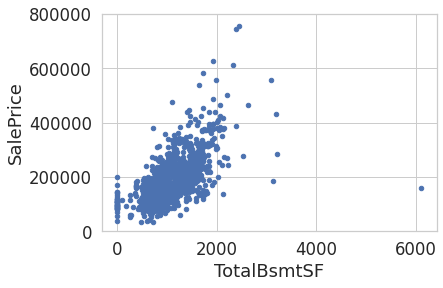

In [ ]:
var_x = 'TotalBsmtSF'
var_y='SalePrice'
data = pd.concat([data_frame[var_y], data_frame[var_x]], axis=1)
data.plot.scatter(x=var_x, y=var_y, ylim=(0,800000))

We remark that, we have a correlation between the Total square feet of basement area (TotalBsmtSF) and The Sale price (SalePrice).

The sale price inscreases with the Ttotal square feet of basement area

We have 3 outliers points.

##Feature 3: OverallQual (Overall Quality)

Here, we will check the impact of the rates the overall material and finish of the house on the sale price (target).

OverallQual=Rates the overall material and finish of the house

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


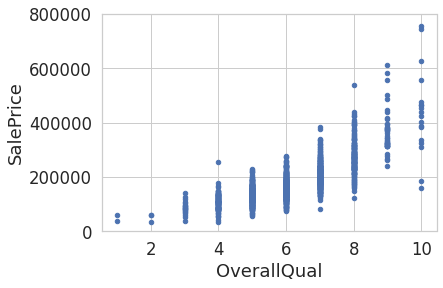

In [ ]:
var_x = 'OverallQual'
var_y='SalePrice'
data = pd.concat([data_frame[var_y], data_frame[var_x]], axis=1)
data.plot.scatter(x=var_x, y=var_y, ylim=(0,800000))

It's difficult to discuss about the correlation between OverallQual and the salePrice. Because the phenomenon is not clear.

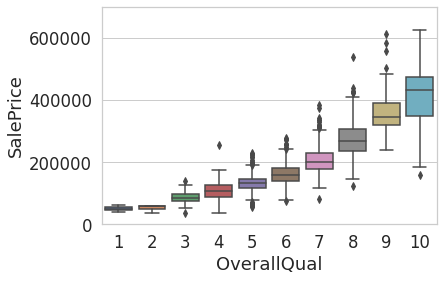

In [ ]:
var_x = 'OverallQual'
var_y='SalePrice'
data = pd.concat([data_frame[var_y], data_frame[var_x]], axis=1)
#plt.subplots(figsize=(14, 15))
fig = sns.boxplot(x=var_x, y=var_y, data=data)
fig.axis(ymin=0, ymax=700000);

The two last response of overall quality contain more outliners for the answers 9 and 10.

## All features based on correlation matrix

**Correlation matrix** allows to compute the correlation between many variables.
Generally, the correlation values range between -1 and 1.

1.   High correlated: to close to 1 => the observed variable has an impact on the predicted target.
2.   Low correlated: to close to 0 or -1 => the observed variable has not an impact on the predicted target.

**For machine learning, because of the time complexity and requirements of the hardware. We use the features with high corralation values.**

We use now a correlation matrix to evaluate the impact of all features on the priceSale.

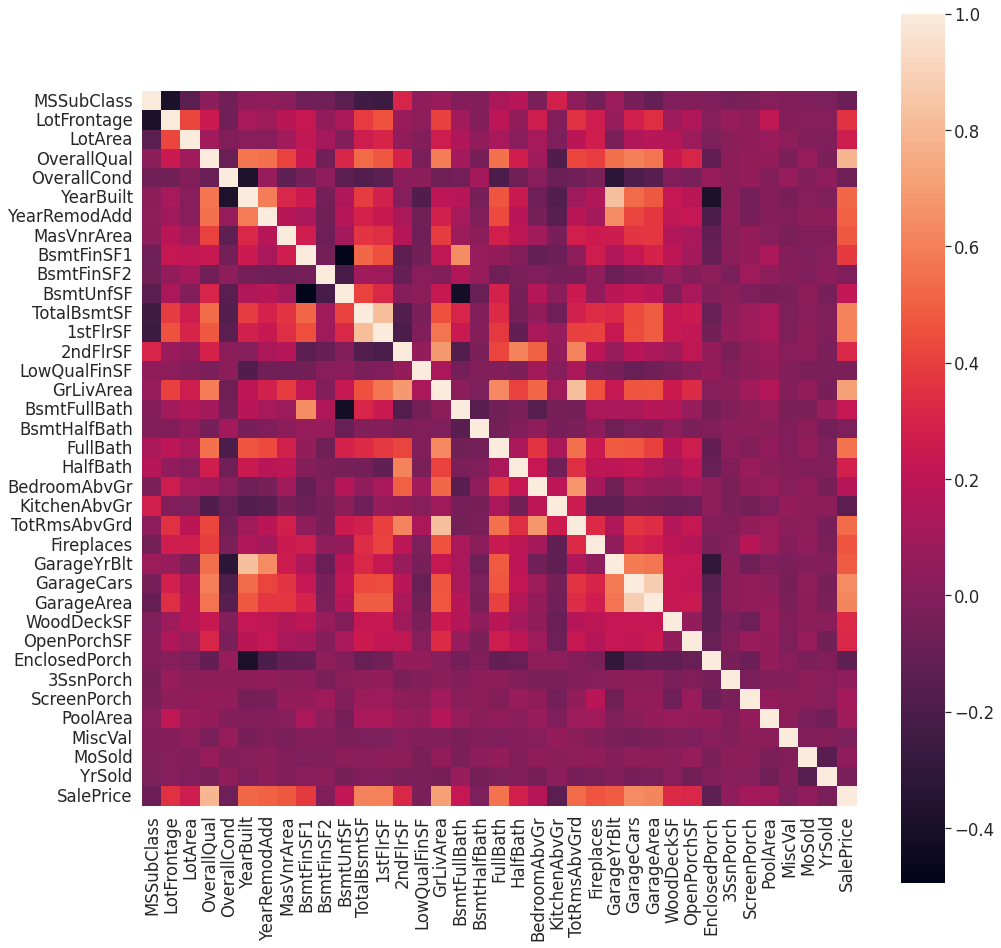

In [ ]:
corrmat = data_frame.corr()
plt.subplots(figsize=(16, 16))
sns.heatmap(corrmat, square=True);

The figure represents the matrix correlation of all features.

The size of correlation matrix is 80 x 80 because we have to cross 80 features with them.

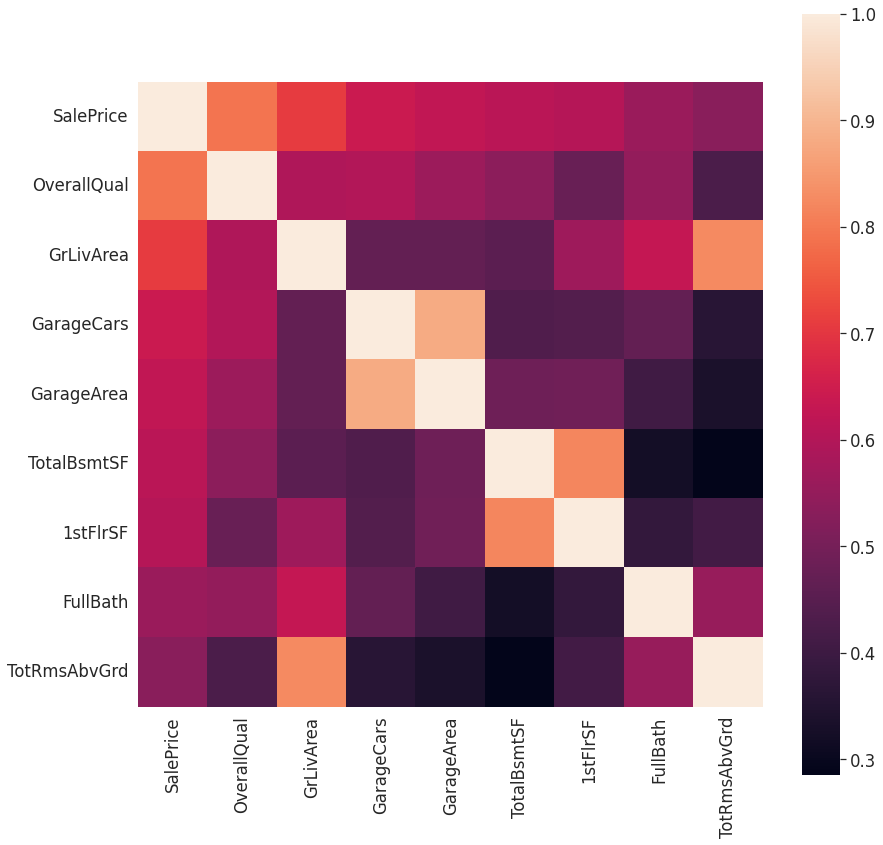

In [ ]:
k = 9 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
plt.subplots(figsize=(14, 14))
sns.heatmap(data_frame[cols].corr(), square=True);

In this matrix, we have the most 9 correlated features:
*  OverallQual
*   GrLivArea
*  GarageCar
*  GarageArea
*  TotalBsmtSF
*  1stFIrSF
*  FullBath
*  TotRmsAbvGrd

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


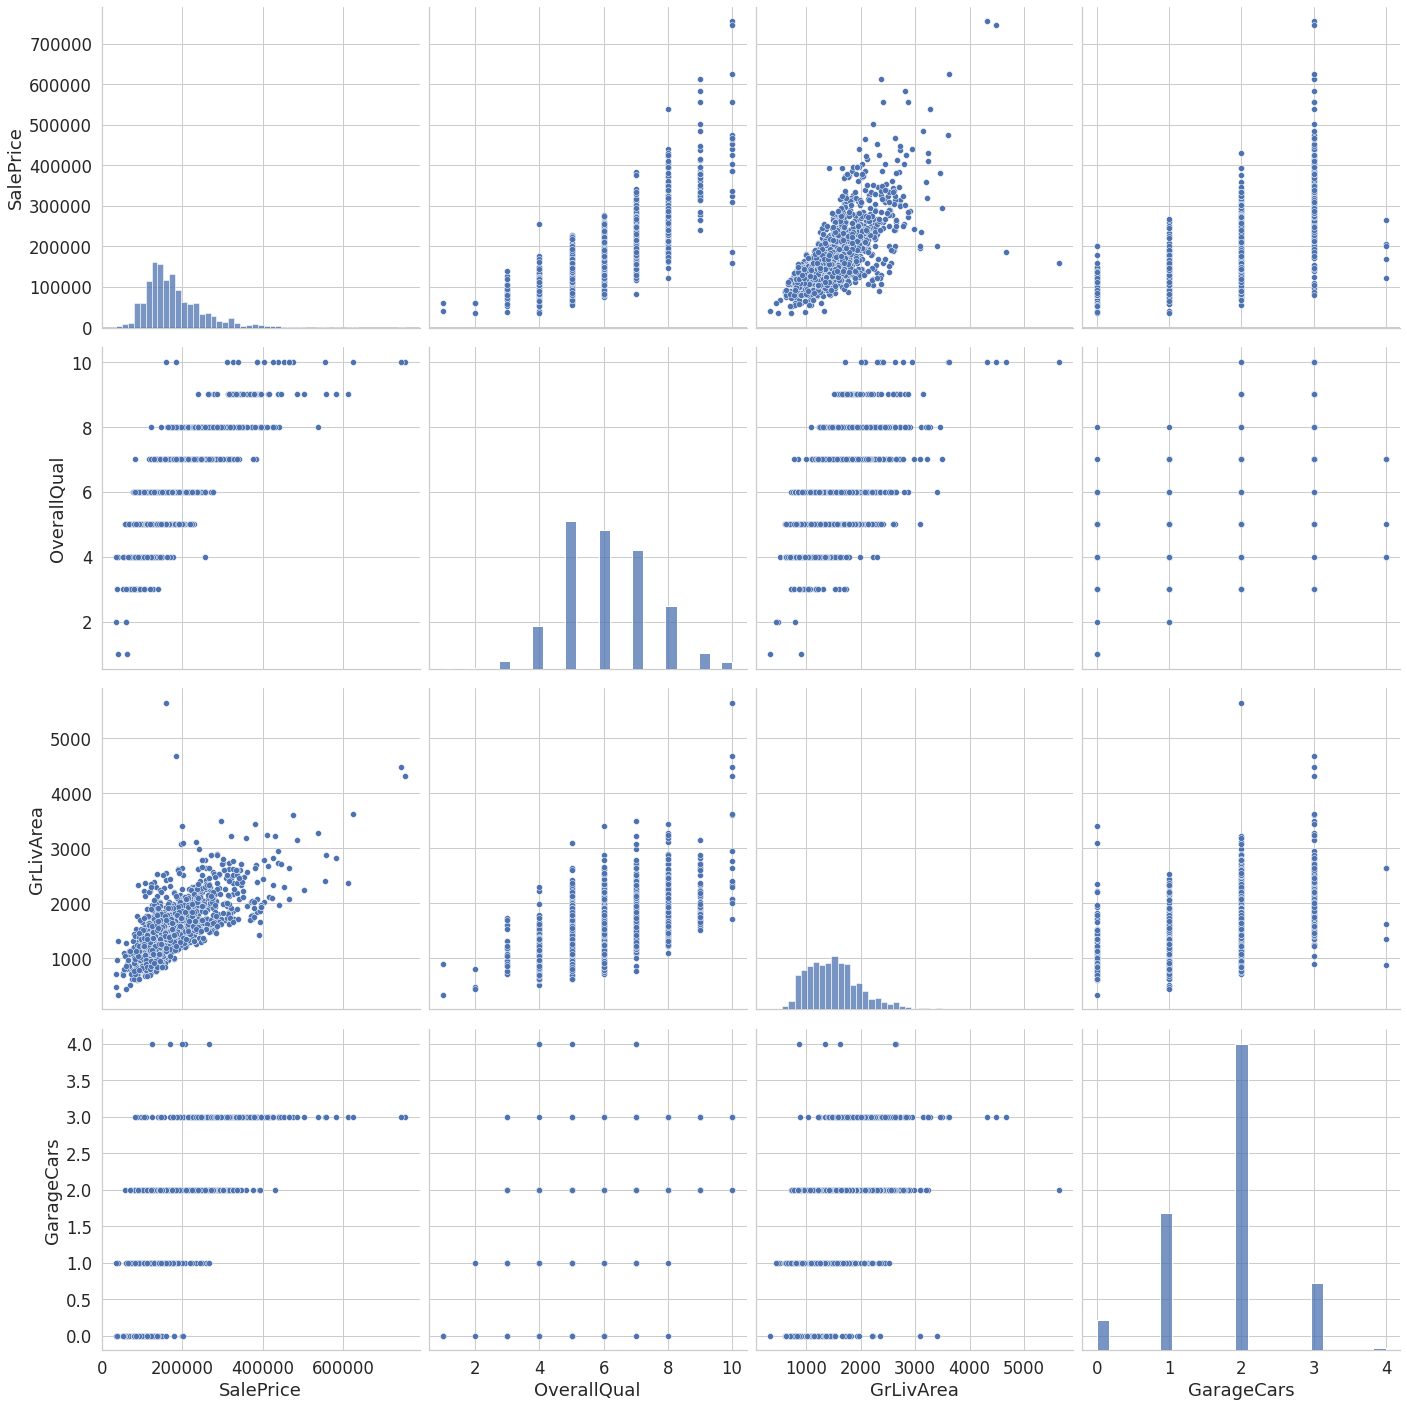

In [ ]:
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars']
sns.pairplot(data_frame[cols], size = 5);

We observe that we have the impact of the features on the predicted target (SalePrice).

## Clean missing values

In [ ]:
total = data_frame.isnull().sum().sort_values(ascending=False)
percent = (data_frame.isnull().sum()/data_frame.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data[missing_data['Percent']>0]

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageType,81,0.055479
GarageCond,81,0.055479
GarageFinish,81,0.055479
GarageQual,81,0.055479


We will clean the dataset by removing all missing values

We need to clean all features that content missing values

In [ ]:
data_frame['PoolQC'].fillna('None', inplace=True)
data_frame['MiscFeature'].fillna('None', inplace=True)
data_frame['Alley'].fillna('None', inplace=True)
data_frame['Fence'].fillna('None', inplace=True)
data_frame['FireplaceQu'].fillna('None', inplace=True)

**We remove all missing values in the features because in the next step, we will encode the categorical labels (discrete values).**

## Label encoding

We use label encoding to transform discrete value to continuous value because machine learning and deep learning algorithms requiere as input a matrix of continous values.

We have lot encoding function in machine learning:
OneHot, word2Vec, Vec2Vec,.....

**Warning: before encoding the label we must convert the type to string (str).**

In [ ]:
data_frame['Street']

0       Pave
1       Pave
2       Pave
3       Pave
4       Pave
        ... 
1455    Pave
1456    Pave
1457    Pave
1458    Pave
1459    Pave
Name: Street, Length: 1460, dtype: object

In [ ]:
catfeatures=['Street','Alley','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood','Condition1', 'Condition2','BldgType','HouseStyle']
for feature in catfeatures:
  #it is necessary to convert the feature into a string value
  data_frame[feature].astype(str)
  le = LabelEncoder()
  # the LabelEncoder has a fit() function that prepare the feature for a better encoding based on most training with the set of data related to the feature
  le.fit(list(data_frame[feature].values))
  #I just replace the old feature with the new encoded feature
  data_frame[feature] = le.transform(list(data_frame[feature].values))

After encoding, we observe a transformation from discrete to continuous value

In [ ]:
data_frame['Street']

0       1
1       1
2       1
3       1
4       1
       ..
1455    1
1456    1
1457    1
1458    1
1459    1
Name: Street, Length: 1460, dtype: int64

## Data partition

We will split the dataset under two subsets 80% for the training set and 20% for the testing.

**Remark: In some case, we can add the validation set**

In this context, it is recommanded to split the dataset under three:
70% => training
20% =>testing
10% => validation

**Remark: We talk about validation set when we move to the production of the model**

In [ ]:
df_train, df_test = train_test_split(data_frame, train_size=0.8, test_size=0.2)

In [ ]:
print("size of the training set", df_train.shape)
print("size of the testing set", df_test.shape)

size of the training set (1168, 80)
size of the testing set (292, 80)


## Prepare the data to matrix

In [ ]:
x0=np.ones(df_train.shape[0]) # is the bias feature (we fix to one by default)
x1=df_train['GrLivArea'] #feature 1
x2=df_train['OverallQual'] #feature 2
x3=df_train['GarageCars'] #feature 3
x4=df_train['FullBath'] # feature 4
x5=df_train['Street']
x6=df_train['Alley']
x7=df_train['LotShape']
x8=df_train['LandContour']
x9=df_train['Utilities']
x10=df_train['LotConfig']
x11=df_train['LandSlope']
x12=df_train['Neighborhood']
x13=df_train['Condition1']
x14=df_train['Condition2']
x15=df_train['BldgType']
x16=df_train['HouseStyle']


y=df_train['SalePrice'] #target


#we create a matrix from the four features
x_train=np.array([x0, x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12, x13, x14, x15, x16]).transpose()
y_train=np.array(y)
print(x_train.shape)
print(y_train.shape)

(1168, 17)
(1168,)


# New Section

The training set contains 1168 samples while the testing set contains 292.

# 4-Linear regression with Scikit-learn

## 4.1 Building and training model

We train the model on the x_train and y_train

In [ ]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

 We collect the learning parameters values theta1,....theta79.

In [ ]:
model.coef_

array([     0.        ,     48.3173327 ,  27268.55843404,  18716.25061966,
         2893.20440282,  25148.07431789,   3542.67414498,  -4260.10115363,
         7422.21823317, -43384.51775107,    328.36647117,  28412.44694438,
          689.50898335,    -96.60094045,  -4428.22415629,  -4146.13680752,
        -2366.57753427])

We check the value of theta0

In [ ]:
model.intercept_

-129519.81696211806

## 4.2 Model prediction

We prepare the testing set.

Transform the testing set into a matrix of testing.

In [ ]:
#Prepare the testing data for prediction
x0=np.ones(df_test.shape[0]) # is the bias feature
x1=df_test['GrLivArea'] #feature 1
x2=df_test['OverallQual'] #feature 2
x3=df_test['GarageCars'] #feature 3
x4=df_test['FullBath'] # feature 4
x5=df_test['Street']
x6=df_test['Alley']
x7=df_test['LotShape']
x8=df_test['LandContour']
x9=df_test['Utilities']
x10=df_test['LotConfig']
x11=df_test['LandSlope']
x12=df_test['Neighborhood']
x13=df_test['Condition1']
x14=df_test['Condition2']
x15=df_test['BldgType']
x16=df_test['HouseStyle']

y=df_test['SalePrice'] #target

#we create a matrix from the three features
x_test=np.array([x0, x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12, x13, x14, x15, x16]).transpose()

y_test=np.array(y)
print(x_test.shape)
print(y_test.shape)

acc=model.score(x_test, y_test)
print('the accuracy of our model is ', round(acc*100,2), '%')

(292, 17)
(292,)
the accuracy of our model is  78.04 %


In [ ]:
y_pred=model.predict(x_test)
df_test['SalePred']=y_pred
#display just the salePrice and SalePredicted
df_test[['SalePrice', 'SalePred']]

,SalePrice,SalePred
1381,237500,225046.942715
432,122500,116504.338445
1336,135000,170000.905083
755,172500,168431.083376
366,159000,188533.772654
...,...,...
843,141000,124149.913380
930,201000,260899.354850
1049,84900,69211.096183
757,158900,187782.169262


## 4.3 Model evaluation

## Mean Squared Error

In [ ]:
mse=mean_squared_error(y_test,y_pred)
print(mse)

1207171179.3192945


We remark that the value of the loss function is too big.

This means that we have to consider another features (more correlated feature)